# Anushka Kawale
## LGMVIP January,2022
## Advanced Level Task 01
## Develop A Neural Network That Can Read Handwriting

In [5]:
#importing libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

In [6]:
(mnist_train_images,mnist_train_labels),(mnist_test_images, mnist_test_labels)=mnist.load_data()

In [7]:
train=mnist_train_images.reshape(60000,784)
test=mnist_test_images.reshape(10000,784)

In [8]:
train=train.astype('float32')
test=test.astype('float32')
train/=255
test/=255

In [9]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


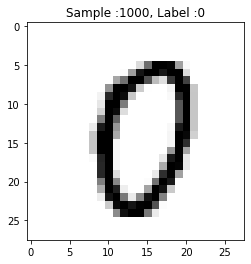

In [10]:
import matplotlib.pyplot as plt
def display(num):
    print(train_labels[num])
    label=train_labels[num].argmax(axis=0)
    image=train[num].reshape([28,28])
    plt.title('Sample :%d, Label :%d'%(num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
display(1000)

In [11]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Model Optimization
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [13]:
# Fitting the training data into model
history=model.fit(train,train_labels,batch_size=100,epochs=10,verbose=2)

Epoch 1/10
600/600 - 7s - loss: 0.2359 - accuracy: 0.9268 - 7s/epoch - 12ms/step
Epoch 2/10
600/600 - 6s - loss: 0.1051 - accuracy: 0.9689 - 6s/epoch - 10ms/step
Epoch 3/10
600/600 - 6s - loss: 0.0788 - accuracy: 0.9767 - 6s/epoch - 9ms/step
Epoch 4/10
600/600 - 6s - loss: 0.0623 - accuracy: 0.9819 - 6s/epoch - 9ms/step
Epoch 5/10
600/600 - 6s - loss: 0.0543 - accuracy: 0.9844 - 6s/epoch - 10ms/step
Epoch 6/10
600/600 - 6s - loss: 0.0475 - accuracy: 0.9869 - 6s/epoch - 10ms/step
Epoch 7/10
600/600 - 6s - loss: 0.0408 - accuracy: 0.9877 - 6s/epoch - 10ms/step
Epoch 8/10
600/600 - 6s - loss: 0.0374 - accuracy: 0.9896 - 6s/epoch - 10ms/step
Epoch 9/10
600/600 - 6s - loss: 0.0346 - accuracy: 0.9902 - 6s/epoch - 9ms/step
Epoch 10/10
600/600 - 6s - loss: 0.0342 - accuracy: 0.9909 - 6s/epoch - 9ms/step


In [14]:
# Model Evaluation
score=model.evaluate(test,test_labels,verbose=0)
print("Test loss",score[0])
print("Test accuracy",score[1])

Test loss 0.10252469778060913
Test accuracy 0.9824000000953674


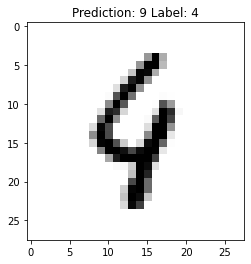

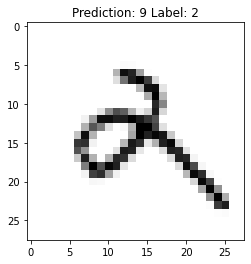

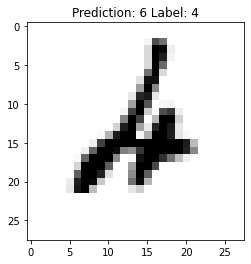

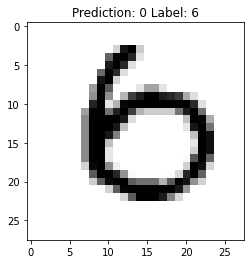

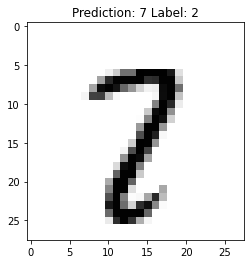

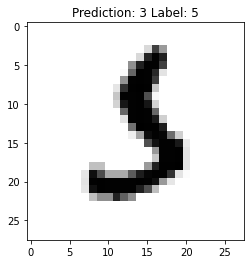

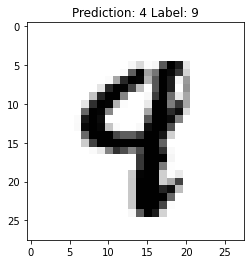

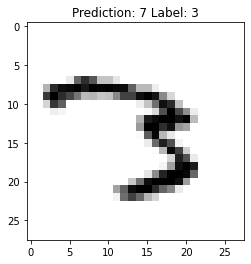

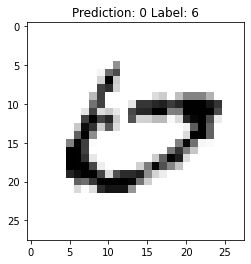

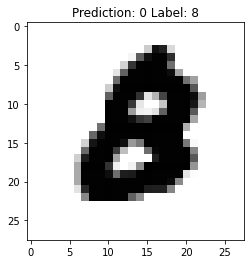

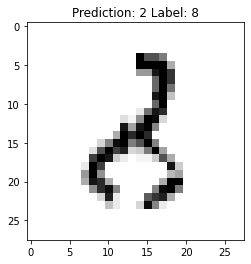

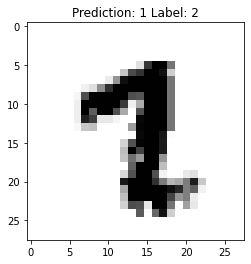

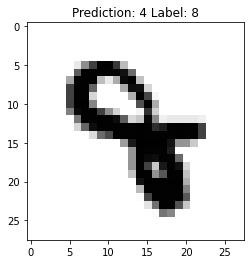

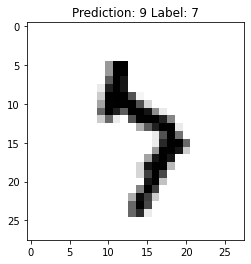

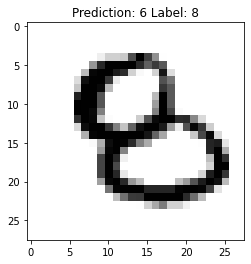

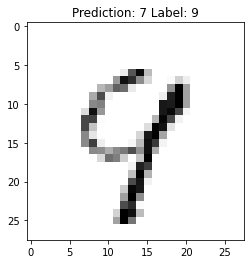

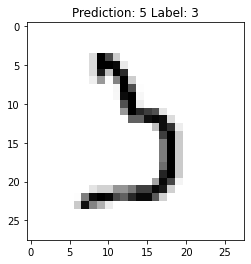

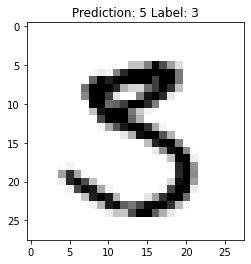

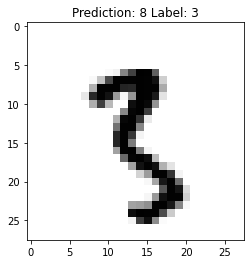

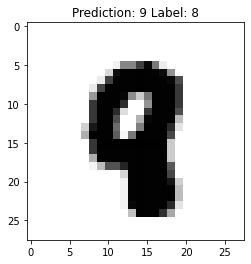

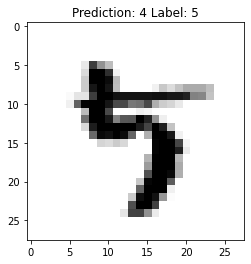

In [15]:
# finding which number have been wrongly predicted

for x in range(1000):
    test_image=test[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image).argmax()
    label=test_labels[x].argmax()
    if predicted_cat!=label:
        plt.title('Prediction: %d Label: %d'%(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()